In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_NG_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,4.0,3.0,2.0,7.0,8.0,2.0,9.0,11.0,7.0,7.0,1.0,8.0,NaN,6.0,NaN
1,4.0,7.0,5.0,5.0,5.0,5.0,9.0,6.0,4.0,8.0,7.0,9.0,2.0,9.0,7.0,10.0,NaN
2,7.0,NaN,NaN,7.0,4.0,8.0,8.0,5.0,10.0,11.0,2.0,8.0,2.0,NaN,5.0,10.0,NaN
3,4.0,9.0,5.0,7.0,4.0,NaN,7.0,NaN,NaN,NaN,6.0,8.0,3.0,8.0,NaN,8.0,NaN
4,6.0,7.0,8.0,5.0,4.0,7.0,6.0,3.0,NaN,10.0,7.0,9.0,3.0,8.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,NaN,NaN,5.0,8.0,3.0,NaN,10.0,7.0,8.0,NaN,NaN,9.0,2.0,9.0,2.0,6.0,NaN
19996,4.0,7.0,6.0,5.0,3.0,NaN,8.0,2.0,NaN,NaN,6.0,8.0,1.0,9.0,6.0,8.0,NaN
19997,4.0,8.0,NaN,6.0,NaN,7.0,8.0,7.0,4.0,10.0,7.0,6.0,3.0,9.0,3.0,7.0,NaN
19998,4.0,11.0,4.0,8.0,3.0,0.0,2.0,4.0,6.0,1.0,0.0,NaN,0.0,8.0,0.0,8.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	3500
float64		column 2	4000
float64		column 3	4000
float64		column 4	2000
float64		column 5	4500
float64		column 6	4000
float64		column 7	4000
float64		column 8	4000
float64		column 9	4000
float64		column 10	5000
float64		column 11	5000
float64		column 12	4500
float64		column 13	2000
float64		column 14	5000
float64		column 15	3000
float64		column 16	5500
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,16500.000000,16000.000000,16000.000000,18000.000000,15500.000000,16000.000000,16000.000000,16000.000000,16000.000000,15000.000000,15000.000000,15500.000000,18000.000000,15000.000000,17000.000000,14500.000000,0.0
mean,4.016424,7.064375,5.115812,5.380722,3.466581,6.922688,7.465687,4.587562,5.172688,8.265467,6.407133,7.950645,3.041389,8.304200,3.676353,7.831931,NaN
std,1.839795,3.201952,1.911349,2.205029,2.014300,1.895669,2.157716,2.509178,2.266150,2.317042,2.354289,1.929683,2.287641,1.394821,2.470716,1.439767,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,7.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.000000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,4.000000,8.000000,NaN
75%,5.000000,9.000000,6.000000,7.000000,4.000000,8.000000,8.000000,6.000000,7.000000,10.000000,7.000000,9.000000,4.000000,9.000000,5.000000,8.000000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,14.000000,15.000000,15.000000,NaN


<AxesSubplot:>

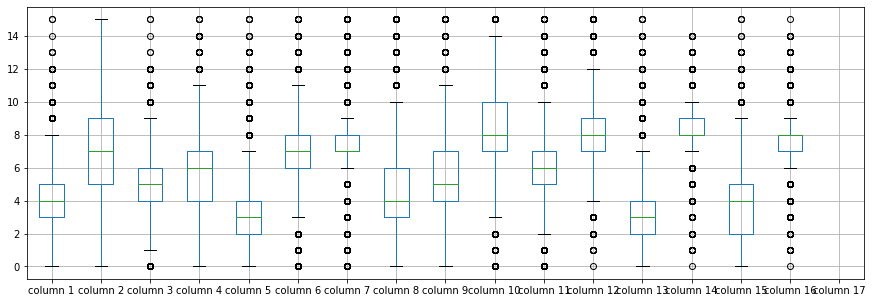

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.016424
column 2     7.064375
column 3     5.115812
column 4     5.380722
column 5     3.466581
column 6     6.922688
column 7     7.465687
column 8     4.587562
column 9     5.172688
column 10    8.265467
column 11    6.407133
column 12    7.950645
column 13    3.041389
column 14    8.304200
column 15    3.676353
column 16    7.831931
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.732743,0.830910,0.649778,0.577091,-0.034444,0.049596,0.009832,0.046760,0.154390,0.044157,-0.044039,0.469221,0.087215,0.251065,-0.095175,NaN
column 2,0.732743,1.000000,0.640044,0.809057,0.525021,0.038111,-0.022718,-0.025553,0.085654,0.149161,-0.030596,-0.018557,0.260044,0.004514,0.214149,-0.030559,NaN
column 3,0.830910,0.640044,1.000000,0.626429,0.737649,0.054071,0.032678,-0.093074,0.049576,0.114431,0.029519,-0.035844,0.536902,0.051168,0.248991,-0.097403,NaN
column 4,0.649778,0.809057,0.626429,1.000000,0.609722,0.039019,-0.007938,0.074714,0.054630,0.011186,0.007952,0.021066,0.254801,0.026781,0.274948,-0.016907,NaN
column 5,0.577091,0.525021,0.737649,0.609722,1.000000,0.116242,-0.015380,-0.009236,-0.057092,-0.052305,-0.046381,-0.039033,0.576898,0.005334,0.451397,-0.045204,NaN
column 6,-0.034444,0.038111,0.054071,0.039019,0.116242,1.000000,-0.340573,-0.045794,-0.114356,0.056232,-0.308505,-0.040196,0.139004,-0.220381,0.114212,0.211562,NaN
column 7,0.049596,-0.022718,0.032678,-0.007938,-0.015380,-0.340573,1.000000,-0.106130,-0.042374,0.135657,0.567066,-0.227129,-0.018632,0.511745,-0.058956,-0.173377,NaN
column 8,0.009832,-0.025553,-0.093074,0.074714,-0.009236,-0.045794,-0.106130,1.000000,-0.146541,-0.293336,0.019015,0.066049,0.120672,-0.066923,0.019808,0.148711,NaN
column 9,0.046760,0.085654,0.049576,0.054630,-0.057092,-0.114356,-0.042374,-0.146541,1.000000,0.116754,-0.064008,0.101421,-0.359304,-0.056345,0.252490,-0.044495,NaN
column 10,0.154390,0.149161,0.114431,0.011186,-0.052305,0.056232,0.135657,-0.293336,0.116754,1.000000,0.058298,-0.103336,-0.163334,0.031776,-0.088062,-0.107982,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+8,17+8+8,17+8+8+8,17+8+8,17+8,17], vae_layer = False, seed = 80)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 58.895225045776364
Epoch: 1 , loss: 39.32721291809082
Epoch: 2 , loss: 36.26706504974365
Epoch: 3 , loss: 34.94097133483887
Epoch: 4 , loss: 34.25162555541992
Epoch: 5 , loss: 33.73650752410889
Epoch: 6 , loss: 33.29597633666992
Epoch: 7 , loss: 33.05761543426514
Epoch: 8 , loss: 32.68425368347168
Epoch: 9 , loss: 32.544038229370116
Epoch: 10 , loss: 32.330646023559574
Epoch: 11 , loss: 32.39031295318603
Epoch: 12 , loss: 32.044739109802244
Epoch: 13 , loss: 32.23446280822754
Epoch: 14 , loss: 31.959912585449217
Epoch: 15 , loss: 31.959837811279296
Epoch: 16 , loss: 31.895162747192384
Epoch: 17 , loss: 31.814372648620605
Epoch: 18 , loss: 31.869265939331054
Epoch: 19 , loss: 31.792058920288085
Epoch: 20 , loss: 31.699633596801757
Epoch: 21 , loss: 31.71681199951172
Epoch: 22 , loss: 31.63906332244873
Epoch: 23 , loss: 31.646237413024902
Epoch: 24 , loss: 31.726255389404297
Epoch: 25 , loss: 31.62904836

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.000000
column 2     7.000000
column 3     3.000000
column 4     5.000000
column 5     2.631669
column 6     1.000000
column 7     1.000000
column 8     5.000000
column 9     5.000000
column 10    0.000000
column 11    1.000000
column 12    5.720294
column 13    0.000000
column 14    8.000000
column 15    2.754343
column 16    8.000000
column 17    0.004934
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-1.282574,0.000000,NaN
1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,NaN
2,0.000000,-5.841478,-4.793903,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.316447,0.000000,0.000000,NaN
3,0.000000,0.000000,0.000000,0.0,0.000000,-0.948217,0.0,-9.138575,3.491711,0.094635,0.000000,0.000000,0.0,0.000000,3.061550,0.000000,NaN
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,-0.130828,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.594746,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-1.141726,-3.136275,0.000000,0.0,0.000000,2.845434,0.0,0.000000,0.000000,-3.927198,-3.698627,0.000000,0.0,0.000000,0.000000,0.000000,NaN
19996,0.000000,0.000000,0.000000,0.0,0.000000,-1.914356,0.0,0.000000,-6.180196,-5.972279,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,NaN
19997,0.000000,0.000000,2.677676,0.0,0.547854,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,NaN
19998,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.938912,0.0,0.000000,0.000000,0.000000,NaN


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

777.736295156802

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [18]:
NRMS=numerator/denominator
NRMS


0.20829526931640038

In [19]:
new_df.iloc[66,:]

column 1      6.000000
column 2      8.469071
column 3     10.000000
column 4      6.453781
column 5     11.000000
column 6     10.000000
column 7      5.000000
column 8      5.262927
column 9      2.000000
column 10     9.000000
column 11     7.438398
column 12     8.000000
column 13    11.000000
column 14     6.000000
column 15     4.000000
column 16     7.000000
column 17     0.002024
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.000000,4.000000,4.000000,3.0,2.000000,7.000000,8.0,2.000000,9.000000,11.000000,7.000000,7.000000,1.0,8.000000,3.717426,6.000000,0.001628
1,4.000000,7.000000,5.000000,5.0,5.000000,5.000000,9.0,6.000000,4.000000,8.000000,7.000000,9.000000,2.0,9.000000,7.000000,10.000000,-0.002625
2,7.000000,4.158522,3.206097,7.0,4.000000,8.000000,8.0,5.000000,10.000000,11.000000,2.000000,8.000000,2.0,5.316447,5.000000,10.000000,-0.000555
3,4.000000,9.000000,5.000000,7.0,4.000000,6.051783,7.0,3.861425,4.491711,7.094635,6.000000,8.000000,3.0,8.000000,3.061550,8.000000,0.001459
4,6.000000,7.000000,8.000000,5.0,4.000000,7.000000,6.0,3.000000,6.869172,10.000000,7.000000,9.000000,3.0,8.000000,3.000000,10.594746,-0.000509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3.858274,6.863725,5.000000,8.0,3.000000,6.845434,10.0,7.000000,8.000000,8.072802,6.301373,9.000000,2.0,9.000000,2.000000,6.000000,-0.002129
19996,4.000000,7.000000,6.000000,5.0,3.000000,5.085644,8.0,2.000000,3.819804,6.027721,6.000000,8.000000,1.0,9.000000,6.000000,8.000000,0.004192
19997,4.000000,8.000000,6.677676,6.0,4.547854,7.000000,8.0,7.000000,4.000000,10.000000,7.000000,6.000000,3.0,9.000000,3.000000,7.000000,0.003365
19998,4.000000,11.000000,4.000000,8.0,3.000000,0.000000,2.0,4.000000,6.000000,1.000000,0.000000,7.938912,0.0,8.000000,0.000000,8.000000,0.001570


In [21]:
imputations[-1].to_excel("Letter_NG_20(imp).xlsx", index=False, header=False)